Name: Samson Yu Bai Jian
<br>Student ID: 1002819

# 1. Linear classification [30 points]
Automatic handwritten digit recognition is an important machine learning task. The US Postal Service Zip Code Database (http://www.unitedstateszipcodes.org/zip-code-database/) provides 16 × 16 pixel images preprocessed from scanned handwritten zip codes (US zip codes are the analogues of Singapore postal codes). The task is to recognize the digit in each image. We shall consider the simpler goal of recognizing only two digits: 1 and 5. To simplify our task even further, let’s consider only two features: intensity and symmetry. Digit 5 generally occupies more black pixels and thus have higher average pixel intensity than digit 1. Digit 1 is usually symmetric but digit 5 is not. By defining asymmetry as the average difference between an image and its flipped versions, and symmetry as the negation of asymmetry, we can get higher symmetry values for digit 1.
    Write an implementation of the perceptron algorithm. Train it on the training set (train_1_5.csv), and evaluate its accuracy on the test set (test_1_5.csv). The training and test sets are posted on eDimension. csv stands for comma-separated values. In the files, each row is an example. The first value is the symmetry, the second is the average intensity, and the third is the label.
    <b>Note: please do <u>NOT</u> shuffle the data. Visit the instances sequentially in the training set when running the perceptron algorithm.</b>

## (c) [20 points] Submit your code together with crystal clear instructions on how to run it. The TA will follow the instructions to run your code and grade accordingly.

In [1]:
import pandas as pd
import numpy as np

# INSTRUCTION: Install pandas and numpy
# INSTRUCTION: Replace with the paths for your train and test datasets ('train_1_5.csv' and 'test_1_5.csv')
train_path = "hw1-data/data/1/train_1_5.csv"
test_path = "hw1-data/data/1/test_1_5.csv"

train_df = pd.read_csv(train_path, names=['symmetry','average intensity','label'])
test_df = pd.read_csv(test_path, names=['symmetry','average intensity','label'])

def perceptron(iterations, train_df, test_df):
    print('\nTraining for ' + str(iterations) + ' iterations...')

    train_len = train_df.shape[0]
    test_len = test_df.shape[0]

    # Set starting weights as [symmetry, average intensity]
    weights = np.asarray([0, 0])

    # Train perceptron algorithm
    for i in range(int(iterations)):
        for j in range(train_len):
            x = np.asarray(train_df[['symmetry','average intensity']].iloc[j])
            y = np.asarray(train_df['label'].iloc[j])

            # Classification is right
            if y * np.dot(weights,x) > 0:
                continue
            # Classification is wrong
            elif y * np.dot(weights,x) <= 0:
                # Update weights
                weights = weights + np.dot(y,x)

#         # Print accuracy for every iteration
#         acc = 0
#         for j in range(train_len):
#             x = np.asarray(train_df[['symmetry','average intensity']].iloc[j])
#             y = np.asarray(train_df['label'].iloc[j])

#             # Classification is right
#             if y * np.dot(weights,x) > 0:
#                 acc += 1
#             # Classification is wrong
#             elif y * np.dot(weights,x) <= 0:
#                 continue

#         acc = acc / train_len
#         print("Train accuracy for iteration " + str(i + 1) + " is: " + str(acc))
    
    print('\nTesting...')

    # Test on test set
    acc = 0
    for i in range(test_len):
        x = np.asarray(test_df[['symmetry','average intensity']].iloc[i])
        y = np.asarray(test_df['label'].iloc[i])

        # Classification is right
        if y * np.dot(weights,x) > 0:
            acc += 1
        # Classification is wrong
        elif y * np.dot(weights,x) <= 0:
            continue

    acc = acc / test_len
    print("Test accuracy is: " + str(acc))

## (a) [5 points] Run the perceptron algorithm for 5 iterations (i.e., traversing the training set 5 times), report the accuracy on the test set.

In [2]:
perceptron(5, train_df, test_df)


Training for 5 iterations...

Testing...
Test accuracy is: 0.9660678642714571


## (b) [5 points] Run the perceptron algorithm for 10 iterations, report the accuracy on the test set.

In [3]:
perceptron(10, train_df, test_df)


Training for 10 iterations...

Testing...
Test accuracy is: 0.9670658682634731


# 2. Linear and polynomial regression [50 points]
For this exercise, you will experiment with linear and polynomial regression on a given data set.
The inputs are in the file hw1x.dat and the desired outputs in hw1y.dat.

## (a) [5 points] Load the data and plot it.

In [4]:
import matplotlib.pyplot as plt

# INSTRUCTION: Install Matplotlib
# INSTRUCTION: Replace with the paths for your x and y data ('hw1x.dat' and 'hw1y.dat')
x = pd.read_csv("hw1-data/data/2/hw1x.dat", names=['x_data'])
y = pd.read_csv("hw1-data/data/2/hw1y.dat", names=['y_data'])

plt.scatter(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

## (b) [5 points] Add a column vector of 1s to the inputs, write a function implementing the closed form linear regression formula discussed in class to obtain the weight vector θ. Plot both the linear regression line and the data on the same graph.

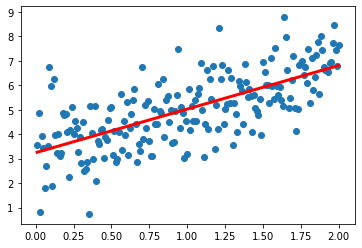

In [5]:
# Add column for the intercept term
x['Column vector'] = 1

# Function implementing the closed form linear regression formula
def closed_form_linear_regression(x, y):
    n = len(x)
    A = np.dot(np.transpose(x),x)/n
    b = np.dot(np.transpose(x),y)/n
    A_inv = np.linalg.inv(A)

    weight = np.dot(A_inv,b)
    
    return weight

weight = closed_form_linear_regression(x,y)

# Plot the data
plt.scatter(x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(x,weight)
plt.plot(x['x_data'], y_pred, color="red", linewidth=3)

## (c) [5 points] Write a function that will evaluate the training error in terms of empirical risk of the resulting fit in 2(b) and report the error.

In [6]:
def empirical_risk_error(y,y_pred):
    n = len(y)
    error = 0
    
    for i in range(n):
        error += ((y['y_data'][i] - y_pred[i])**2)/2
    error = error/n
    
    return error[0]
    
print("Training error: " + str(empirical_risk_error(y,y_pred)))

Training error: 0.5812605752543933


## (d) [10 points] Write a function to calculate the weight vector θ using gradient descent. Consider learning rate as η = 0.01 and number of iterations as 100. Report θ for minimum empirical risk from all the iterations.

In [7]:
def gradient_descent(x,y,lr,iterations):    
    n = len(x)
    
    weight = np.zeros((2,1))
    
    for i in range(int(iterations)):
        for j in range(n):
            weight += lr * np.dot(np.transpose(x['x_data'][j]),y['y_data'][j] - np.dot(x['x_data'][j],weight)) 
        
        y_pred = np.dot(x,weight)
        error = empirical_risk_error(y,y_pred)
            
        if i == 0:
            min_weight = weight
            min_error = error
        else:
            if error < min_error:
                min_error = error
                min_weight = weight
    
    return min_weight

print("θ for minimum risk across all iterations for GD is: " + str(gradient_descent(x,y,0.01,100)))

θ for minimum risk across all iterations for GD is: [[3.81649204]
 [3.81649204]]


## (e) [10 points] Write a function to calculate the weight vector θ using stochastic gradient descent. Consider learning rate as η = 0.01 and number of iterations as 50. Report θ for minimum empirical risk from all the iterations.

In [8]:
import random

def stochastic_gradient_descent(x,y,lr,iterations):    
    n = len(x)
    
    weight = np.zeros((2,1))
    
    for i in range(int(iterations)):
        num = random.randint(0, n-1)
        weight += lr * np.dot(np.transpose(x['x_data'][num]),y['y_data'][num] - np.dot(x['x_data'][num],weight)) 
        
        y_pred = np.dot(x,weight)
        error = empirical_risk_error(y,y_pred)
            
        if i == 0:
            min_weight = weight
            min_error = error
        else:
            if error < min_error:
                min_error = error
                min_weight = weight
    
    return min_weight

print("θ for minimum risk across all iterations for SGD is: " + str(stochastic_gradient_descent(x,y,0.01,50)))

θ for minimum risk across all iterations for SGD is: [[2.03160551]
 [2.03160551]]


## (f) [10 points] Write a function called PolyRegress(x,y,d) which adds the features x^2, x^3, ...x^d to the inputs and performs polynomial regression using closed form solution.

In [9]:
def PolyRegress(x,y,d):
    n = len(x)
    
    temp_x = x
    
    for i in range(2,d+1):
        temp_x['x' + str(i) + '_data'] = temp_x['x_data']**i
    
    A = np.dot(np.transpose(temp_x),temp_x)/n
    b = np.dot(np.transpose(temp_x),y)/n
    A_inv = np.linalg.inv(A)

    weight = np.dot(A_inv,b)
    
    return weight, temp_x

## (g) [5 points] Use your function to get a quadratic fit of the data. Plot the data and the fit. Report the training error. Is this a better fit? Repeat the same for 3rd order fit to 9th order fit. After which order fit does the error get worse?

Error for 2nd order fit is: 0.5703016121648221


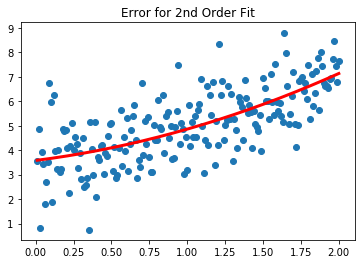

In [10]:
weight, temp_x = PolyRegress(x,y,2)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 2nd Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 2nd order fit is: " + str(empirical_risk_error(y,y_pred)))

Error for 3rd order fit is: 0.5700844364691351


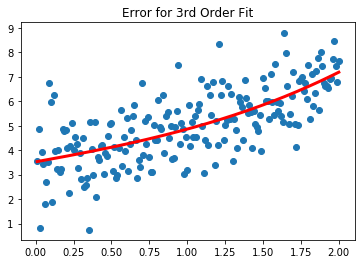

In [11]:
weight, temp_x = PolyRegress(x,y,3)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 3rd Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 3rd order fit is: " + str(empirical_risk_error(y,y_pred)))

Error for 4th order fit is: 0.5646163879286422


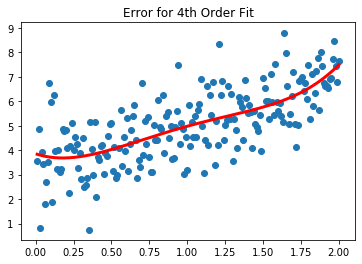

In [12]:
weight, temp_x = PolyRegress(x,y,4)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 4th Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 4th order fit is: " + str(empirical_risk_error(y,y_pred)))

Error for 5th order fit is: 0.56389681847492


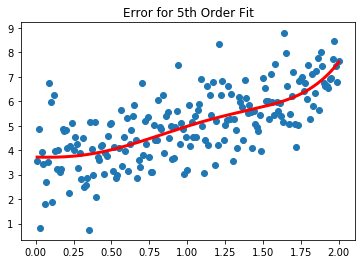

In [13]:
weight, temp_x = PolyRegress(x,y,5)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 5th Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 5th order fit is: " + str(empirical_risk_error(y,y_pred)))

Error for 6th order fit is: 0.5613433038902959


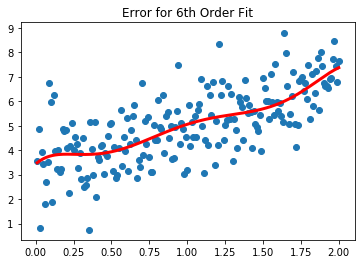

In [14]:
weight, temp_x = PolyRegress(x,y,6)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 6th Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 6th order fit is: " + str(empirical_risk_error(y,y_pred)))

Error for 7th order fit is: 0.5562352515819269


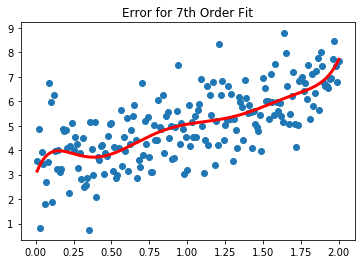

In [15]:
weight, temp_x = PolyRegress(x,y,7)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 7th Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 7th order fit is: " + str(empirical_risk_error(y,y_pred)))

Error for 8th order fit is: 0.5537805799308618


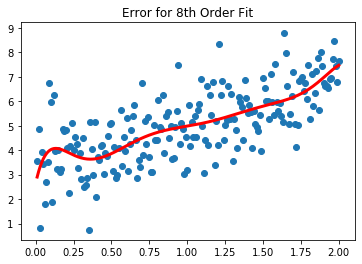

In [16]:
weight, temp_x = PolyRegress(x,y,8)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 8th Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 8th order fit is: " + str(empirical_risk_error(y,y_pred)))

Error for 9th order fit is: 0.552923134474618


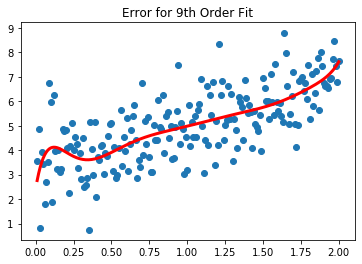

In [17]:
weight, temp_x = PolyRegress(x,y,9)

# Plot the data
plt.scatter(temp_x['x_data'],y)
# Plot the linear regression line
y_pred = np.dot(temp_x,weight)
plt.title("Error for 9th Order Fit")
plt.plot(temp_x['x_data'], y_pred, color="red", linewidth=3)

print("Error for 9th order fit is: " + str(empirical_risk_error(y,y_pred)))

The error does not get worse.

# 3. Ridge regression [20 points]
In this problem, we will explore the effects of ridge regression on generalization. We will use hw1_ridge_x.dat as the inputs and hw1_ridge_y.dat as the desired output. Please note that a column vector of 1s is already added to the inputs. Recall from Lecture Notes 4, the optimal weight for ridge regression is given by
θ̂ = (nλI + X^T X)(X^T Y)
    To find a suitable value for λ, we will set aside a small subset of the provided data set for estimating the test loss. This subset is called validation set, which we use to compute validation loss. The remainder of the data will be called the training set. Let the first 10 entries of the data set be the validation set, and the last 40 entries be the training set. Concatenate their features into matrices vX and tX, and their responses into vectors vY and tY.

## (a) [10 points] Write a function ridge regression(tX, tY, l) that takes the training features, training responses and regularizing parameter λ, and outputs the exact solution θ for ridge regression. Report the resulting value of θ for λ = 0.15.

In [18]:
# INSTRUCTION: Replace with the paths for your x and y data ('hw1_ridge_x.dat' and 'hw1_ridge_y.dat')
X = "hw1-data/data/3/hw1_ridge_x.dat"
Y = "hw1-data/data/3/hw1_ridge_y.dat"

X_df = pd.read_csv(X, names=['x_data_1', 'x_data2', 'x_data3', 'Column vector'])
Y_df = pd.read_csv(Y, names=['y_data'])

tX = X_df[10:]
tY = Y_df[10:]
vX = X_df[:10]
vY = Y_df[:10]
I = 0.15

def ridge_regression(tX, tY, I):
    weights = np.asarray([[0], [0], [0], [0]])
    for i in range(len(tX)):
        # Set learning rate
        lr = 1/(i+1)
        
        # Update weights
        weights = (1 - I*lr) * weights + lr * np.dot(np.transpose(tX),tY - np.dot(tX, weights))
    return weights
    
print("Resulting value of weights are: " + str(ridge_regression(tX,tY, I)))

Resulting value of weights are: [[ 1.44377349e+10]
 [-2.33458781e+10]
 [-4.54019203e+09]
 [-9.05365749e+09]]


## (b) [10 points] Use the following code to plot graphs of the validation loss and training loss as λ varies on logarithmic scale from λ = 10^−5 to λ = 10^0 . Write down the value of λ that minimizes the validation loss.

The value of λ that minimizes the validation loss is: 10^-4.9


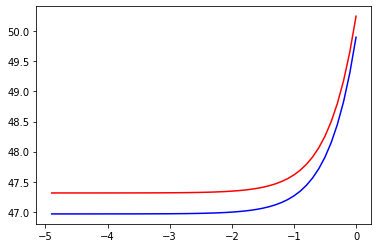

In [19]:
tn = tX.shape[0]
vn = vX.shape[0]

tloss = []
vloss = []

index = -np.arange(0, 5, 0.1)

for i in index:
    w = ridge_regression(tX, tY, 10**i)
    tloss = tloss + [np.sum((np.dot(tX, w)-tY)**2) / tn / 2]
    vloss = vloss + [np.sum((np.dot(vX, w)-vY)**2) / vn / 2]

# Plot the graph
plt.plot(index,np.log(tloss),'r')
plt.plot(index,np.log(vloss),'b')

vloss_list = []
for i in vloss:
    vloss_list.append(i[0])

min_loss = min(vloss_list)
min_index = vloss_list.index(min_loss)
min_reg_pow = index[min_index]
print("The value of λ that minimizes the validation loss is: 10^" + str(min_reg_pow))